In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('MergedData_Final.csv')
#data = pd.read_csv('Processed_FinalData.csv')

In [3]:
data.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'IssuerActuarialValue', 'AVCalculatorOutputNumber', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'FirstTierUtilization', 'SecondTierUtilization', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'IndividualRate', 'BusinessYear_y', 'StateCode_y', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule',
       'ChildrenOnlyContrac

In [4]:
data['IndividualRate'].describe()

count    96009.000000
mean       559.346528
std        461.479284
min          0.000000
25%        287.548333
50%        464.360992
75%        797.368333
max       9999.000000
Name: IndividualRate, dtype: float64

In [5]:
data.drop(columns=['BusinessYear_y', 'StateCode_y','DentalOnlyPlan_y'], inplace=True)

In [6]:
data.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'IssuerActuarialValue', 'AVCalculatorOutputNumber', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'FirstTierUtilization', 'SecondTierUtilization', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'IndividualRate', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule', 'ChildrenOnlyContractMaxChildrenRule',
       'DomesticPartn

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data.head(2)

,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,IndividualRate,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage
0,No,46944AL0380001,ALN001,ALS001,Existing,PPO,Silver,Not Applicable,Yes,Both,No,No,No,Allows Adult and Child-Only,Yes,0.9998,0.0,NotApplicable,Yes,Yes,Yes,46944AL0380001-00,Standard Silver Off Exchange Plan,0.72,0.0,No,Yes,Yes,0.95,0.05,No,2018,AL,No Preference,0-14,179.310000,A different rate (specifically for parties of ...,3 or more,3 or more,25,3 or more,No,No,Age on effective date,Not Applicable,SHOP (Small Group)
1,No,46944AL0380001,ALN001,ALS001,Existing,PPO,Silver,Not Applicable,Yes,Both,No,No,No,Allows Adult and Child-Only,Yes,0.9998,0.0,NotApplicable,Yes,Yes,Yes,46944AL0380001-00,Standard Silver Off Exchange Plan,0.72,0.0,No,Yes,Yes,0.95,0.05,No,2018,AL,No Preference,15-25,221.714056,A different rate (specifically for parties of ...,3 or more,3 or more,25,3 or more,No,No,Age on effective date,Not Applicable,SHOP (Small Group)


In [9]:
data.describe()

,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization,BusinessYear_x,IndividualRate
count,96009.000000,96009.000000,96009.000000,96009.000000,96009.000000,96009.000000,96009.0,96009.000000
mean,0.835345,0.151980,0.270679,0.620484,0.913324,0.086676,2018.0,559.346528
std,0.366084,0.356042,0.378314,0.340701,0.197919,0.197919,0.0,461.479284
min,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,2018.0,0.000000
25%,0.988200,0.000000,0.000000,0.604723,1.000000,0.000000,2018.0,287.548333
50%,0.999000,0.000000,0.000000,0.711570,1.000000,0.000000,2018.0,464.360992
75%,1.000000,0.000000,0.700000,0.867181,1.000000,0.000000,2018.0,797.368333
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,2018.0,9999.000000


In [10]:
data['DependentMaximumAgRule'].value_counts()

25                74269
26                 9813
30                 3724
Not Applicable     3388
29                 3205
21                 1043
27                  567
Name: DependentMaximumAgRule, dtype: int64

In [11]:
conti =data[['EHBPercentTotalPremium', 'EHBPediatricDentalApportionmentQuantity','IssuerActuarialValue','IndividualRate','AVCalculatorOutputNumber', 'FirstTierUtilization', 'SecondTierUtilization']]
transformed = data.drop(columns=conti).apply(LabelEncoder().fit_transform)

In [12]:
transformed['index'] = transformed.index
conti['index'] = conti.index

C:\Users\samyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
conti.shape

(96009, 8)

In [14]:
processed = pd.merge(transformed,conti, on='index')

In [15]:
processed.columns

Index(['DentalOnlyPlan_x', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'IsNewPlan', 'PlanType', 'MetalLevel', 'DesignType', 'UniquePlanDesign', 'QHPNonQHPTypeId', 'IsNoticeRequiredForPregnancy', 'IsReferralRequiredForSpecialist', 'CompositeRatingOffered', 'ChildOnlyOffering', 'WellnessProgramOffered', 'IsGuaranteedRate', 'OutOfCountryCoverage', 'OutOfServiceAreaCoverage', 'NationalNetwork', 'PlanId', 'CSRVariationType', 'MedicalDrugDeductiblesIntegrated', 'MedicalDrugMaximumOutofPocketIntegrated', 'MultipleInNetworkTiers', 'IsHSAEligible', 'BusinessYear_x', 'StateCode_x', 'Tobacco', 'age_cat', 'EnrolleeContractRateDeterminationRule', 'TwoParentFamilyMaxDependentsRule', 'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule', 'ChildrenOnlyContractMaxChildrenRule', 'DomesticPartnerAsSpouseIndicator', 'SameSexPartnerAsSpouseIndicator', 'AgeDeterminationRule', 'MinimumTobaccoFreeMonthsRule', 'MarketCoverage', 'index', 'EHBPercentTotalPremium',
       'EHBPediatricDentalApp

In [16]:
processed.head()

,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,index,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization
0,0,2277,2,2,0,4,7,4,1,0,0,0,0,0,1,2,1,1,1,7822,16,0,1,1,0,0,1,0,0,0,1,1,1,1,0,0,1,2,1,0,0.9998,0.0,0.72,179.310000,0.0,0.95,0.05
1,0,2277,2,2,0,4,7,4,1,0,0,0,0,0,1,2,1,1,1,7822,16,0,1,1,0,0,1,0,1,0,1,1,1,1,0,0,1,2,1,1,0.9998,0.0,0.72,221.714056,0.0,0.95,0.05
2,0,2277,2,2,0,4,7,4,1,0,0,0,0,0,1,2,1,1,1,7822,16,0,1,1,0,0,1,0,2,0,1,1,1,1,0,0,1,2,1,2,0.9998,0.0,0.72,266.949846,0.0,0.95,0.05
3,0,2277,2,2,0,4,7,4,1,0,0,0,0,0,1,2,1,1,1,7822,16,0,1,1,0,0,1,0,3,0,1,1,1,1,0,0,1,2,1,3,0.9998,0.0,0.72,306.562077,0.0,0.95,0.05
4,0,2277,2,2,0,4,7,4,1,0,0,0,0,0,1,2,1,1,1,7822,16,0,1,1,0,0,1,0,4,0,1,1,1,1,0,0,1,2,1,4,0.9998,0.0,0.72,431.564327,0.0,0.95,0.05


In [17]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = processed.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [19]:
del processed['index']

In [20]:
X = processed.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y = processed[['IndividualRate']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
rfr = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

C:\Users\samyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [23]:
print("Mean Absolute Error for RF: %.2f" %metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error for RF: %.2f" %metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error-SQRT for RF: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score for RF: %.4f" %metrics.r2_score(y_test, y_pred))

Mean Absolute Error for RF: 28.68
Mean Squared Error for RF: 6231.53
Mean Squared Error-SQRT for RF: 78.94
R2 Score for RF: 0.9704


In [24]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age_cat,3.760422e-01
EHBPediatricDentalApportionmentQuantity,1.171429e-01
DentalOnlyPlan_x,9.414332e-02
QHPNonQHPTypeId,8.201250e-02
IsGuaranteedRate,7.427558e-02
MetalLevel,3.886203e-02
StateCode_x,3.598698e-02
DependentMaximumAgRule,3.158491e-02
MarketCoverage,2.685702e-02
IssuerActuarialValue,2.151001e-02


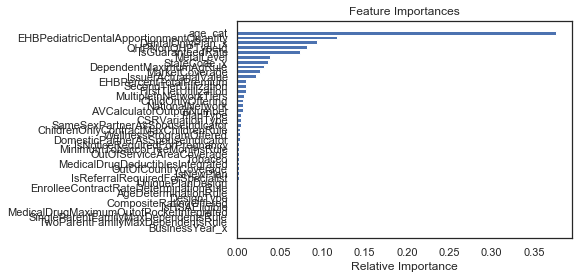

In [25]:
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
########### Extreme Gradient Boosting (Xgboost) ##############
#!pip install xgboost

In [27]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [28]:
print("Mean Absolute Error for XgBoost: %.2f" %metrics.mean_absolute_error(y_test, preds))
print("Mean Squared Error for XgBoost: %.2f" %metrics.mean_squared_error(y_test, preds))
print("Mean Squared Error-SQRT for XgBoost: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, preds)))
print("R2 Score for XgBoost: %.4f" %metrics.r2_score(y_test, preds))

Mean Absolute Error for XgBoost: 219.75
Mean Squared Error for XgBoost: 151926.36
Mean Squared Error-SQRT for XgBoost: 389.78
R2 Score for XgBoost: 0.2778


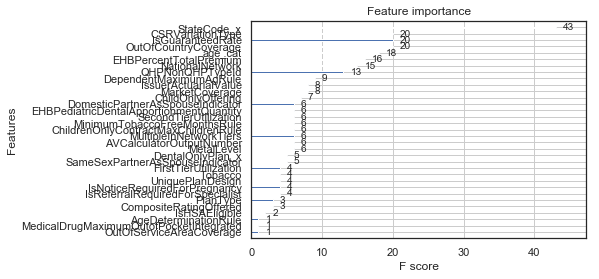

In [29]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
from statistics import mean
scores = cross_val_score(xg_reg, X, y, scoring='neg_mean_squared_error', cv=5)
print(np.sqrt(-scores))

[293.94653842 472.69615692 468.40105708 414.8410672  322.15246444]


In [31]:
scores = cross_val_score(xg_reg, X, y, scoring='r2', cv=10)
print(mean(scores))

0.2198009670009426


In [32]:
############## Clustering ###################
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(processed)
data_transformed = mms.transform(processed)

In [33]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

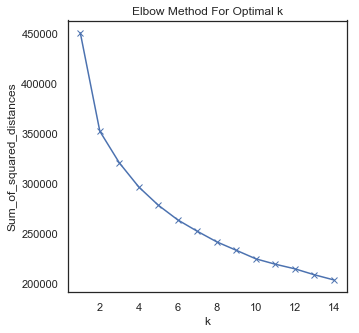

In [34]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

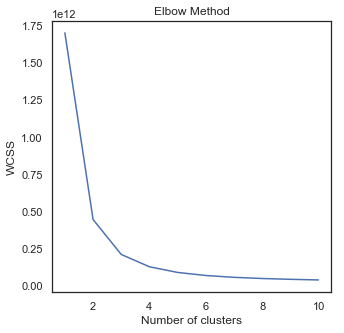

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(processed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.32741692e-01  7.11321375e+02  6.60063255e+01  9.81197130e+01
   3.62348943e-01  1.99150302e+00  4.69155967e+00  3.76378399e+00
   1.69845166e-01  9.93202417e-02  1.19618580e-01  2.71053625e-01
   1.58610272e-02  4.83383686e-02  1.80135952e-01  1.83969033e+00
   7.43863293e-01  7.90974320e-01  2.07987160e-01  2.27416626e+03
   8.84186178e+00  5.20959215e-01  8.67258308e-01  3.83308157e-02
   8.85574018e-02  0.00000000e+00  1.90010385e+01  7.60574018e-01
   3.03276057e+00  2.45468278e-03  1.00000000e+00  1.00000000e+00
   1.66493580e+00  3.31004532e-01  7.67843656e-01  7.76529456e-01
   1.00000000e+00  1.18721677e+00  1.35762840e-01  8.62450895e-01
   1.22142938e-01  2.31639917e-01  6.15721259e+02  6.33930188e-01
   9.86485083e-01  1.35149169e-02]
 [ 2.32197853e-01  2.97552730e+03  6.53860009e+01  1.03008586e+02
   2.17452170e-01  1.89062063e+00  4.55734951e+00  3.90331311e+00
   1.94680355e-01  1.69855343e-01  1.54829678e-01  1.41763882e-01
   4.24638357e-02  7.30751283e-02  2.8940

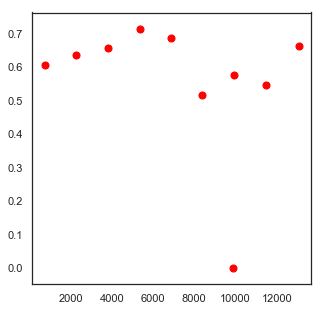

In [37]:
plt.scatter(centroids[:, 19], centroids[:, 43], c='red', s=50)

In [38]:
centroids[:, 0]

array([0.13274169, 0.23219785, 0.05599473, 0.0936505 , 0.1278264 ,
       0.16211847, 0.22597865, 0.27542889, 1.        , 0.10015218])

In [39]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_final.fit(processed)
centroids_final = kmeans_final.cluster_centers_
print(centroids_final)

[[2.07825187e-01 3.52653510e+03 7.31967270e+01 1.16394927e+02
  3.13195598e-01 1.83032887e+00 4.61770699e+00 3.84462489e+00
  1.90049221e-01 1.35404584e-01 2.33282127e-01 2.27576261e-01
  1.74938082e-02 8.72809355e-02 2.47107878e-01 1.75273537e+00
  5.69426592e-01 6.96554535e-01 2.76609085e-01 1.15469835e+04
  9.16785278e+00 5.28168793e-01 7.75496128e-01 1.26406872e-01
  9.12938521e-02 0.00000000e+00 2.11398878e+01 6.20998840e-01
  3.00692855e+00 2.31996740e-03 1.00000000e+00 1.00000000e+00
  1.18819952e+00 7.09815970e-01 8.20610089e-01 8.37476879e-01
  9.96770856e-01 1.33598771e+00 1.86537919e-01 7.76124753e-01
  2.03550917e-01 3.08344985e-01 5.07427039e+02 5.95966619e-01
  9.40373703e-01 5.96262971e-02]
 [1.29085942e-01 7.20678180e+02 7.72902628e+01 1.20140516e+02
  4.31123811e-01 2.12877194e+00 4.54297108e+00 3.81536722e+00
  2.14086099e-01 9.61472038e-02 4.52789902e-02 2.19204321e-01
  5.27522216e-03 4.64093949e-02 2.32549377e-01 1.84943637e+00
  8.01959368e-01 8.81684303e-01 3.563

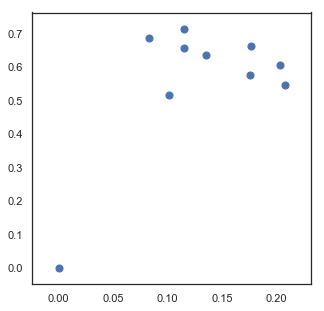

In [40]:
plt.scatter(centroids[:, 38], centroids[:, 43], s=50)

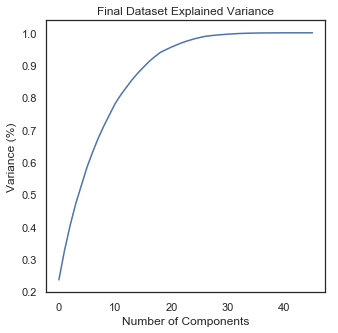

In [41]:
from sklearn.decomposition import PCA
pca1=PCA().fit(data_transformed)
plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Final Dataset Explained Variance')
plt.show()

In [42]:
processed['StateCode_x'].value_counts()

36    10863
33     9040
5      7731
9      7020
26     6965
29     5984
15     4273
6      3779
35     2845
18     2338
32     2106
13     2009
10     1924
27     1862
3      1765
28     1722
16     1693
24     1603
23     1597
19     1596
34     1423
31     1290
2      1239
30     1218
12     1145
20     1092
11     1008
8       994
37      882
14      851
0       807
25      791
7       777
21      777
22      753
1       735
38      588
17      469
4       455
Name: StateCode_x, dtype: int64

In [46]:
df_01 = processed.loc[processed['StateCode_x'] == 36]
df_02 = processed.loc[processed['StateCode_x'] == 33]
print(df_01.shape)
print(df_02.shape)

(10863, 46)
(9040, 46)


In [47]:
X_train = df_01.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_train = df_01[['IndividualRate']]
X_test = df_02.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_test = df_02[['IndividualRate']]

rfr_1 = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr_1.fit(X_train,y_train)
y_pred=rfr_1.predict(X_test)

C:\Users\samyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [48]:
print("Mean Absolute Error for RF: %.2f" %metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error for RF: %.2f" %metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error-SQRT for RF: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score for RF: %.4f" %metrics.r2_score(y_test, y_pred))

Mean Absolute Error for RF: 65.86
Mean Squared Error for RF: 12028.39
Mean Squared Error-SQRT for RF: 109.67
R2 Score for RF: 0.9099


In [49]:
df_01.head()

,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization
5278,0,588,127,214,0,4,7,4,1,2,0,0,0,0,1,2,1,1,0,1908,17,1,1,0,0,0,36,1,0,0,1,1,1,1,0,0,1,1,0,1.0,0.0,0.72,375.355000,0.70307,1.0,0.0
5279,0,588,127,214,0,4,7,4,1,2,0,0,0,0,1,2,1,1,0,1908,17,1,1,0,0,0,36,1,1,0,1,1,1,1,0,0,1,1,0,1.0,0.0,0.72,464.119091,0.70307,1.0,0.0
5280,0,588,127,214,0,4,7,4,1,2,0,0,0,0,1,2,1,1,0,1908,17,1,1,0,0,0,36,1,2,0,1,1,1,1,0,0,1,1,0,1.0,0.0,0.72,558.812500,0.70307,1.0,0.0
5281,0,588,127,214,0,4,7,4,1,2,0,0,0,0,1,2,1,1,0,1908,17,1,1,0,0,0,36,1,3,0,1,1,1,1,0,0,1,1,0,1.0,0.0,0.72,641.734000,0.70307,1.0,0.0
5282,0,588,127,214,0,4,7,4,1,2,0,0,0,0,1,2,1,1,0,1908,17,1,1,0,0,0,36,1,4,0,1,1,1,1,0,0,1,1,0,1.0,0.0,0.72,903.403500,0.70307,1.0,0.0


In [50]:
df_02.head()

,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization
4914,0,2252,117,178,0,1,7,4,0,0,0,0,0,0,1,2,1,1,0,7742,16,0,1,0,0,0,33,0,0,0,1,1,2,1,1,1,1,2,0,1.0,0.0,0.0,245.156250,0.678048,1.0,0.0
4915,0,2252,117,178,0,1,7,4,0,0,0,0,0,0,1,2,1,1,0,7742,16,0,1,0,0,0,33,0,1,0,1,1,2,1,1,1,1,2,0,1.0,0.0,0.0,303.130341,0.678048,1.0,0.0
4916,0,2252,117,178,0,1,7,4,0,0,0,0,0,0,1,2,1,1,0,7742,16,0,1,0,0,0,33,0,2,0,1,1,2,1,1,1,1,2,0,1.0,0.0,0.0,364.976750,0.678048,1.0,0.0
4917,0,2252,117,178,0,1,7,4,0,0,0,0,0,0,1,2,1,1,0,7742,16,0,1,0,0,0,33,0,3,0,1,1,2,1,1,1,1,2,0,1.0,0.0,0.0,419.134875,0.678048,1.0,0.0
4918,0,2252,117,178,0,1,7,4,0,0,0,0,0,0,1,2,1,1,0,7742,16,0,1,0,0,0,33,0,4,0,1,1,2,1,1,1,1,2,0,1.0,0.0,0.0,590.039000,0.678048,1.0,0.0


In [51]:
y_test.head()

,IndividualRate
4914,245.156250
4915,303.130341
4916,364.976750
4917,419.134875
4918,590.039000


In [60]:
y_pred

array([292.90058007, 362.67624451, 496.76455607, ...,  10.01196   ,
        24.97324   ,  24.92904   ])

In [54]:
data['StateCode_x'].value_counts()

WI    10863
TX     9040
FL     7731
IL     7020
OH     6965
PA     5984
MI     4273
GA     3779
VA     2845
MT     2338
TN     2106
LA     2009
IN     1924
OK     1862
AZ     1765
OR     1722
MO     1693
NM     1603
NJ     1597
NC     1596
UT     1423
SD     1290
AR     1239
SC     1218
KY     1145
ND     1092
KS     1008
IA      994
WV      882
ME      851
AK      807
NV      791
HI      777
NE      777
NH      753
AL      735
WY      588
MS      469
DE      455
Name: StateCode_x, dtype: int64

In [55]:
processed['MarketCoverage'].value_counts()

0    81989
1    14020
Name: MarketCoverage, dtype: int64

In [56]:
### Training on Individual Plans predicting on SHOP plans

df_03 = processed.loc[processed['MarketCoverage'] == 0]
df_04 = processed.loc[processed['MarketCoverage'] == 1]
print(df_03.shape)
print(df_04.shape)

(81989, 46)
(14020, 46)


In [57]:
X_train = df_03.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_train = df_03[['IndividualRate']]
X_test = df_04.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_test = df_04[['IndividualRate']]

rfr_2 = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr_2.fit(X_train,y_train)
y_pred=rfr_2.predict(X_test)

C:\Users\samyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [58]:
print("Mean Absolute Error for RF: %.2f" %metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error for RF: %.2f" %metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error-SQRT for RF: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score for RF: %.4f" %metrics.r2_score(y_test, y_pred))

Mean Absolute Error for RF: 167.20
Mean Squared Error for RF: 397778.29
Mean Squared Error-SQRT for RF: 630.70
R2 Score for RF: -1.9032


In [62]:
data['PlanId']

0        46944AL0380001-00
1        46944AL0380001-00
2        46944AL0380001-00
3        46944AL0380001-00
4        46944AL0380001-00
5        46944AL0380001-00
6        46944AL0380001-00
7        46944AL0380001-01
8        46944AL0380001-01
9        46944AL0380001-01
10       46944AL0380001-01
11       46944AL0380001-01
12       46944AL0380001-01
13       46944AL0380001-01
14       73301AL0020001-01
15       73301AL0020001-01
16       73301AL0020001-01
17       73301AL0020001-01
18       73301AL0020001-01
19       73301AL0020001-01
20       73301AL0020001-01
21       73301AL0020001-02
22       73301AL0020001-02
23       73301AL0020001-02
24       73301AL0020001-02
25       73301AL0020001-02
26       73301AL0020001-02
27       73301AL0020001-02
28       73301AL0020001-03
29       73301AL0020001-03
30       73301AL0020001-03
31       73301AL0020001-03
32       73301AL0020001-03
33       73301AL0020001-03
34       73301AL0020001-03
35       73301AL0020002-01
36       73301AL0020002-01
3

In [64]:
############# training model on states with maxmium plan variants(top 5) and testing on other states ##########

states = [36,33,5,9,26]
df_05 = processed.loc[processed.StateCode_x.isin(states)]
print(df_05.shape)
df_05.head()

(41619, 46)


,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization
735,0,2542,13,18,0,1,7,0,0,0,0,1,0,0,1,2,1,1,0,8606,2,0,1,0,0,0,5,0,0,0,1,1,5,1,1,1,1,2,0,1.0,0.0,0.0,371.307500,0.946923,1.0,0.0
736,0,2542,13,18,0,1,7,0,0,0,0,1,0,0,1,2,1,1,0,8606,2,0,1,0,0,0,5,0,1,0,1,1,5,1,1,1,1,2,0,1.0,0.0,0.0,459.112955,0.946923,1.0,0.0
737,0,2542,13,18,0,1,7,0,0,0,0,1,0,0,1,2,1,1,0,8606,2,0,1,0,0,0,5,0,2,0,1,1,5,1,1,1,1,2,0,1.0,0.0,0.0,552.783875,0.946923,1.0,0.0
738,0,2542,13,18,0,1,7,0,0,0,0,1,0,0,1,2,1,1,0,8606,2,0,1,0,0,0,5,0,3,0,1,1,5,1,1,1,1,2,0,1.0,0.0,0.0,634.811875,0.946923,1.0,0.0
739,0,2542,13,18,0,1,7,0,0,0,0,1,0,0,1,2,1,1,0,8606,2,0,1,0,0,0,5,0,4,0,1,1,5,1,1,1,1,2,0,1.0,0.0,0.0,893.658125,0.946923,1.0,0.0


In [65]:
df_06 = processed.loc[processed['StateCode_x'] == 4]
print(df_06.shape)
df_06.head()

(455, 46)


,DentalOnlyPlan_x,StandardComponentId,NetworkId,ServiceAreaId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,CompositeRatingOffered,ChildOnlyOffering,WellnessProgramOffered,IsGuaranteedRate,OutOfCountryCoverage,OutOfServiceAreaCoverage,NationalNetwork,PlanId,CSRVariationType,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,IsHSAEligible,BusinessYear_x,StateCode_x,Tobacco,age_cat,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,MarketCoverage,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IssuerActuarialValue,IndividualRate,AVCalculatorOutputNumber,FirstTierUtilization,SecondTierUtilization
6706,0,3325,10,15,0,0,7,4,0,0,0,0,0,0,1,2,1,1,1,11030,0,0,1,0,0,0,4,1,0,0,1,1,1,0,1,1,1,1,0,0.9966,0.0,0.0,357.480000,0.738681,1.0,0.0
6707,0,3325,10,15,0,0,7,4,0,0,0,0,0,0,1,2,1,1,1,11030,0,0,1,0,0,0,4,1,1,0,1,1,1,0,1,1,1,1,0,0.9966,0.0,0.0,442.013636,0.738681,1.0,0.0
6708,0,3325,10,15,0,0,7,4,0,0,0,0,0,0,1,2,1,1,1,11030,0,0,1,0,0,0,4,1,2,0,1,1,1,0,1,1,1,1,0,0.9966,0.0,0.0,532.195000,0.738681,1.0,0.0
6709,0,3325,10,15,0,0,7,4,0,0,0,0,0,0,1,2,1,1,1,11030,0,0,1,0,0,0,4,1,3,0,1,1,1,0,1,1,1,1,0,0.9966,0.0,0.0,611.169000,0.738681,1.0,0.0
6710,0,3325,10,15,0,0,7,4,0,0,0,0,0,0,1,2,1,1,1,11030,0,0,1,0,0,0,4,1,4,0,1,1,1,0,1,1,1,1,0,0.9966,0.0,0.0,860.375000,0.738681,1.0,0.0


In [66]:
X_train = df_05.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_train = df_05[['IndividualRate']]
X_test = df_06.drop(columns=['IndividualRate', 'StandardComponentId', 'NetworkId', 'ServiceAreaId', 'PlanId'])
y_test = df_06[['IndividualRate']]

rfr_3 = RandomForestRegressor(n_estimators = 250, random_state=0)               #RandomForestRegressor
rfr_3.fit(X_train,y_train)
y_pred=rfr_3.predict(X_test)

C:\Users\samyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [67]:
print("Mean Absolute Error for RF: %.2f" %metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error for RF: %.2f" %metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error-SQRT for RF: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score for RF: %.4f" %metrics.r2_score(y_test, y_pred))

Mean Absolute Error for RF: 63.19
Mean Squared Error for RF: 14139.37
Mean Squared Error-SQRT for RF: 118.91
R2 Score for RF: 0.9311


In [68]:
y_test.head()

,IndividualRate
6706,357.480000
6707,442.013636
6708,532.195000
6709,611.169000
6710,860.375000


In [73]:
y_pred = pd.DataFrame(data=y_pred)

In [74]:
y_pred.head()

,0
0,340.271054
1,421.259636
2,505.569162
3,587.720574
4,822.645137


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96009 entries, 0 to 96008
Data columns (total 46 columns):
DentalOnlyPlan_x                           96009 non-null object
StandardComponentId                        96009 non-null object
NetworkId                                  96009 non-null object
ServiceAreaId                              96009 non-null object
IsNewPlan                                  96009 non-null object
PlanType                                   96009 non-null object
MetalLevel                                 96009 non-null object
DesignType                                 96009 non-null object
UniquePlanDesign                           96009 non-null object
QHPNonQHPTypeId                            96009 non-null object
IsNoticeRequiredForPregnancy               96009 non-null object
IsReferralRequiredForSpecialist            96009 non-null object
CompositeRatingOffered                     96009 non-null object
ChildOnlyOffering                          960